### Importing Basic Libraries

In [1]:
import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

Using TensorFlow backend.


1.15.0
2.3.1


In [2]:
import random

import numpy as np
import pandas as pd
import os
import glob
import datetime

## Load the Data

In [3]:
df = pd.read_csv('cfa_nn_data.csv')
# df.head()
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['date'])

In [4]:
df.head()

,date,Bombay Stock Exchange: Index: 100,Bombay Stock Exchange: Index: SENSEX,Bombay Stock Exchange: Index: 200,Bombay Stock Exchange: Index: Dollex-200,Bombay Stock Exchange: Index: 500,Bombay Stock Exchange: Index: Information Technology,Bombay Stock Exchange: Index: Capital Goods,Bombay Stock Exchange: Index: Fast Moving Consumer Goods,Bombay Stock Exchange: Index: Consumer Durables,...,T Bills: Govt of India: State Governments: Total,T Bills: Govt of India: State Governments: Intermediate: 14 Days,T Bills: Govt of India: State Governments: Auction: 91 Days,T Bills: Govt of India: State Governments: Auction: 182 Days,T Bills: Govt of India: State Governments: Auction: 364 Days,T Bills: Govt of India: Others: Total,T Bills: Govt of India: Others: Intermediate: 14 Days,T Bills: Govt of India: Others: Auction: 91 Days,T Bills: Govt of India: Others: Auction: 182 Days,T Bills: Govt of India: Others: Auction: 364 Days
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,1636.49,5375.11,635.04,243.17,1920.08,4260.20,1196.46,1172.50,1526.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04,1690.67,5491.01,652.91,249.89,1972.29,4554.08,1179.47,1138.74,1517.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,1643.14,5357.00,636.89,243.65,1922.87,4342.29,1145.40,1116.22,1470.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,date,Bombay Stock Exchange: Index: 100,Bombay Stock Exchange: Index: SENSEX,Bombay Stock Exchange: Index: 200,Bombay Stock Exchange: Index: Dollex-200,Bombay Stock Exchange: Index: 500,Bombay Stock Exchange: Index: Information Technology,Bombay Stock Exchange: Index: Capital Goods,Bombay Stock Exchange: Index: Fast Moving Consumer Goods,Bombay Stock Exchange: Index: Consumer Durables,...,T Bills: Govt of India: State Governments: Total,T Bills: Govt of India: State Governments: Intermediate: 14 Days,T Bills: Govt of India: State Governments: Auction: 91 Days,T Bills: Govt of India: State Governments: Auction: 182 Days,T Bills: Govt of India: State Governments: Auction: 364 Days,T Bills: Govt of India: Others: Total,T Bills: Govt of India: Others: Intermediate: 14 Days,T Bills: Govt of India: Others: Auction: 91 Days,T Bills: Govt of India: Others: Auction: 182 Days,T Bills: Govt of India: Others: Auction: 364 Days
7357,2020-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7358,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7359,2020-02-24,11941.07,40363.23,4989.47,1156.22,15469.29,16176.41,16374.24,11308.68,26874.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7360,2020-02-25,11903.01,40281.20,4972.74,1151.86,15418.71,16270.52,16262.28,11306.25,26572.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7361,2020-02-26,11777.28,39888.96,4919.40,1143.14,15256.99,16022.85,15921.25,11238.48,26442.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(7362, 345)

## Cleaning Data

#### Let's drop the weekends as the Indian Stock Market does not work on weekends

In [7]:
df = df[(df['date'].dt.dayofweek != 5)&(df['date'].dt.dayofweek != 6)]

#### Let's remove the columns having NaN more than 10%

In [8]:
df.isnull().mean()

date                                                     0.000000
Bombay Stock Exchange: Index: 100                        0.050590
Bombay Stock Exchange: Index: SENSEX                     0.050399
Bombay Stock Exchange: Index: 200                        0.050399
Bombay Stock Exchange: Index: Dollex-200                 0.052682
                                                           ...   
T Bills: Govt of India: Others: Total                    0.799924
T Bills: Govt of India: Others: Intermediate: 14 Days    0.800304
T Bills: Govt of India: Others: Auction: 91 Days         0.799924
T Bills: Govt of India: Others: Auction: 182 Days        0.851845
T Bills: Govt of India: Others: Auction: 364 Days        0.799924
Length: 345, dtype: float64

In [9]:
df = df.loc[:,df.isnull().mean() <= 0.1]
df.shape

(5258, 61)

In [10]:
df = df.dropna(axis=0,how='all',subset=df.columns[1:])
df.shape

(5258, 61)

#### Let's impute the remaining columns with linear interpolation

In [11]:
date = df['date']
df = df[df.columns[1:]].astype(float).interpolate(method='linear',axis=0,limit=30,limit_direction='forward')

df['date'] = date
df = df.sort_values('date')

In [12]:
df.head()

,Bombay Stock Exchange: Index: 100,Bombay Stock Exchange: Index: SENSEX,Bombay Stock Exchange: Index: 200,Bombay Stock Exchange: Index: Dollex-200,Bombay Stock Exchange: Index: 500,Bombay Stock Exchange: Index: Information Technology,Bombay Stock Exchange: Index: Capital Goods,Bombay Stock Exchange: Index: Fast Moving Consumer Goods,Bombay Stock Exchange: Index: Consumer Durables,Bombay Stock Exchange: Index: Health Care,...,National Stock Exchange: PE Ratio: Nifty 50,National Stock Exchange: PB Ratio: Nifty 50,National Stock Exchange: Dividend Yield: Nifty 50,National Stock Exchange: Turnover: Value,National Stock Exchange: Turnover: Volume,National Stock Exchange: Turnover: Trade: Advance,National Stock Exchange: Turnover: Trade: Decline,National Stock Exchange: Trade,National Stock Exchange: Market Capitalization: Total,date
2,1636.49,5375.11,635.04,243.17,1920.08,4260.20,1196.46,1172.50,1526.33,2246.26,...,25.91,4.63,0.95,17533.5,76.083,1020.0,142.0,267038.0,9121240.0,2000-01-03
3,1690.67,5491.01,652.91,249.89,1972.29,4554.08,1179.47,1138.74,1517.65,2285.99,...,26.67,4.76,0.92,42680.2,106.734,464.0,747.0,445618.0,9369010.0,2000-01-04
4,1643.14,5357.00,636.89,243.65,1922.87,4342.29,1145.40,1116.22,1470.10,2194.35,...,25.97,4.64,0.95,71379.8,146.836,387.0,790.0,651968.0,9186620.0,2000-01-05
5,1644.78,5421.53,636.96,243.68,1923.36,4160.10,1174.28,1168.77,1531.15,2183.91,...,26.32,4.70,0.94,53708.6,124.514,631.0,511.0,529011.0,9221700.0,2000-01-06
6,1606.46,5414.48,620.91,237.59,1871.82,3828.79,1138.47,1207.37,1497.40,2114.89,...,26.25,4.69,0.94,32486.1,101.047,317.0,795.0,372075.0,9022490.0,2000-01-07


## Making the Data Stationary

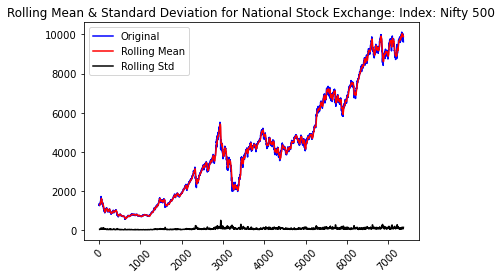

Results of Dickey-Fuller Test:
Test Statistic                    0.078353
p-value                           0.964552
# Lags Used                      13.000000
Number of Observations Used    5244.000000
Critical Value (1%)              -3.431598
Critical Value (5%)              -2.862091
Critical Value (10%)             -2.567063
dtype: float64


In [13]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.graphics.tsaplots as tsaplots

def test_stationarity(df, ts):
    
    #Rolling Statistics
    rolmean = df[ts].rolling(window=12, center = False).mean()
    rolstd = df[ts].rolling(window=12, center = False).std()
    
    #plot rolling statistics
    orig = plt.plot(df[ts], color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # H0 : Time Series is not Stationary
    # Ha : Time Series is Stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df, 'National Stock Exchange: Index: Nifty 500')

#### Performing stationarity

In [14]:
def percentageChange(x, numLags):
    y = (x - x.shift(numLags))/x.shift(numLags)
    return y

dataForMl = pd.DataFrame()
dataForMl['date'] = df['date']

levelVars = df.columns[:-1]
for levelVar in levelVars:
    dataForMl[f'{levelVar}Ret'] = percentageChange(df[levelVar],1)
    
dataForMl = dataForMl[1:]

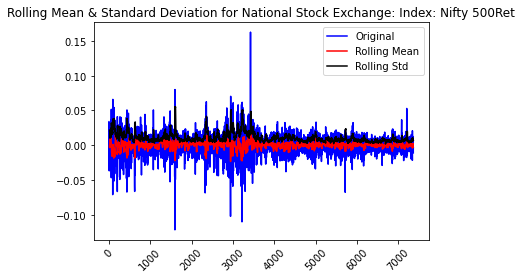

Results of Dickey-Fuller Test:
Test Statistic                -1.741829e+01
p-value                        4.842084e-30
# Lags Used                    1.300000e+01
Number of Observations Used    5.243000e+03
Critical Value (1%)           -3.431598e+00
Critical Value (5%)           -2.862091e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


In [15]:
test_stationarity(dataForMl, 'National Stock Exchange: Index: Nifty 500Ret')

### Lags in the data is essentially the amount of difference we need to take from the current day, the bigger the number, the bigger is the flatness.

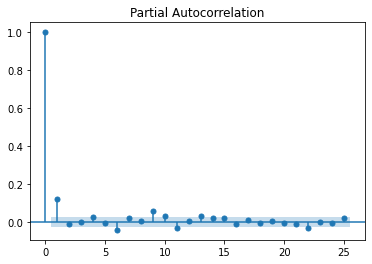

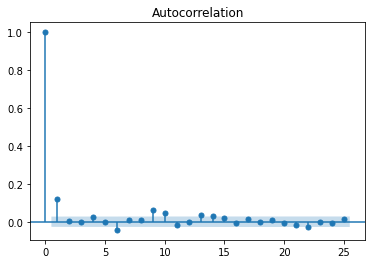

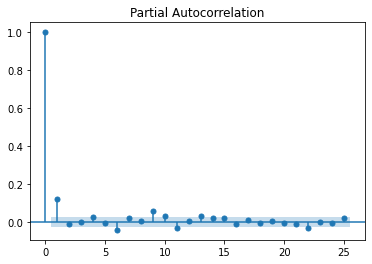

In [16]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf

tsaplots.plot_acf(dataForMl['National Stock Exchange: Index: Nifty 500Ret'].astype(float),lags=25)
tsaplots.plot_pacf(dataForMl['National Stock Exchange: Index: Nifty 500Ret'].astype(float),lags=25)

In [17]:
minLagNum = 1
maxLagNum = 10
dataForMl = dataForMl.sort_values(['date'])
for column in dataForMl.columns:
    for lag in range(minLagNum, maxLagNum+1):
        dataForMl[f'{column}Lag_{lag}'] = dataForMl[f'{column}'].shift(lag)
        
dataForMl.head(5)

,date,Bombay Stock Exchange: Index: 100Ret,Bombay Stock Exchange: Index: SENSEXRet,Bombay Stock Exchange: Index: 200Ret,Bombay Stock Exchange: Index: Dollex-200Ret,Bombay Stock Exchange: Index: 500Ret,Bombay Stock Exchange: Index: Information TechnologyRet,Bombay Stock Exchange: Index: Capital GoodsRet,Bombay Stock Exchange: Index: Fast Moving Consumer GoodsRet,Bombay Stock Exchange: Index: Consumer DurablesRet,...,National Stock Exchange: Market Capitalization: TotalRetLag_1,National Stock Exchange: Market Capitalization: TotalRetLag_2,National Stock Exchange: Market Capitalization: TotalRetLag_3,National Stock Exchange: Market Capitalization: TotalRetLag_4,National Stock Exchange: Market Capitalization: TotalRetLag_5,National Stock Exchange: Market Capitalization: TotalRetLag_6,National Stock Exchange: Market Capitalization: TotalRetLag_7,National Stock Exchange: Market Capitalization: TotalRetLag_8,National Stock Exchange: Market Capitalization: TotalRetLag_9,National Stock Exchange: Market Capitalization: TotalRetLag_10
3,2000-01-04,0.033107,0.021562,0.028140,0.027635,0.027192,0.068983,-0.014200,-0.028793,-0.005687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,-0.028113,-0.024405,-0.024536,-0.024971,-0.025057,-0.046506,-0.028886,-0.019776,-0.031331,...,0.027164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-01-06,0.000998,0.012046,0.000110,0.000123,0.000255,-0.041957,0.025214,0.047079,0.041528,...,-0.019467,0.027164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000-01-07,-0.023298,-0.001300,-0.025198,-0.024992,-0.026797,-0.079640,-0.030495,0.033026,-0.022042,...,0.003819,-0.019467,0.027164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000-01-10,0.012219,0.019191,0.015332,0.038722,0.015290,0.014830,0.022319,0.039847,0.033632,...,-0.021602,0.003819,-0.019467,0.027164,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dataForMl = dataForMl.sort_values('date')

dataForMl = dataForMl.dropna()

final_vars = [col for col in dataForMl.columns if (col.find('Lag')!=-1) & (col.find('date')==-1)]

dep_var = 'National Stock Exchange: Index: Nifty 500Ret'

final_vars.append(dep_var)

dataForMl_copy = dataForMl

dataForMl = dataForMl[final_vars]

## Training, Validation and Testing

In [19]:
test_percent = 0.10
no_test_obs = int(np.round(test_percent*len(dataForMl)))
training = dataForMl[:-no_test_obs]
testing = dataForMl[-no_test_obs:]

valid_percent = 0.70
no_valid_obs = int(np.round(valid_percent*len(testing)))
validation = testing[:-no_valid_obs]
outOfSample = testing[-no_valid_obs:]

## Data Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
trainNormal = normalizer.fit_transform(training.values)
validationNormal = normalizer.fit_transform(validation.values)
outOfSampleNormal = normalizer.fit_transform(outOfSample.values)

## Rescaling Normalized Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
trainMinMax = min_max_scaler.fit_transform(trainNormal)
validationMinMax = min_max_scaler.fit_transform(validationNormal)
outOfSampleMinMax = min_max_scaler.fit_transform(outOfSampleNormal)

In [22]:
trainMinMax_x, trainMinMax_y = trainMinMax[:,:-1], trainMinMax[:,-1]

validationMinMax_x, validationMinMax_y = validationMinMax[:,:-1], validationMinMax[:,-1]

outOfSampleMinMax_x, outOfSampleMinMax_y = outOfSampleMinMax[:,:-1], outOfSampleMinMax[:,-1]

## SARIMA

In [23]:
import statsmodels.tsa.stattools
import statsmodels.api as sm

# (p,d,q) are determined by ACF and PACF.

# p - Log Value where PACF chart crosses the upper confidence interval for first time.
# q - Log Value where ACF chart crosses the upper confidence interval for first time.

p = 1 # the trend autoregressive order
d = 0 # the trend difference order
q = 1 # the trend moving average order

P = 1 # the trend seasonal autoregressive order
D = 0 # the trend seasonal difference order
Q = 1 # the trend seasonal moving average order
M = 7 # the number of time steps for a seasonal period

order = (p,d,q)
seasonalorder = (P,D,Q,M)
model = sm.tsa.statespace.SARIMAX(trainMinMax_y,
                                  order=order,
                                  seasonal_order=seasonalorder,
                                  trend='c') #,exog=trainMinMax_x

model_fit = model.fit()

total_preds = len(testing)
sarimaPred = model_fit.predict(start=1,end=total_preds)

In [24]:
from sklearn.metrics import mean_squared_error
def plot_results(actual_y, predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(['Actual','Predicted'])
    plt.show()

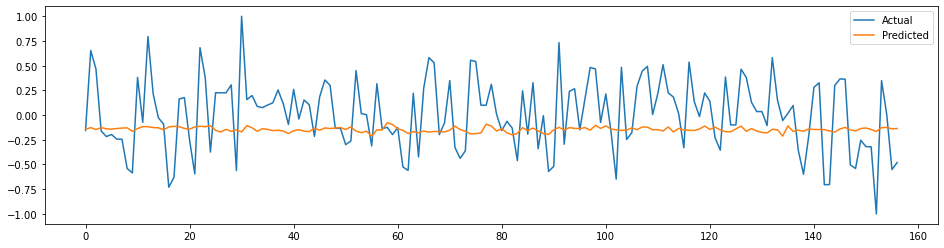

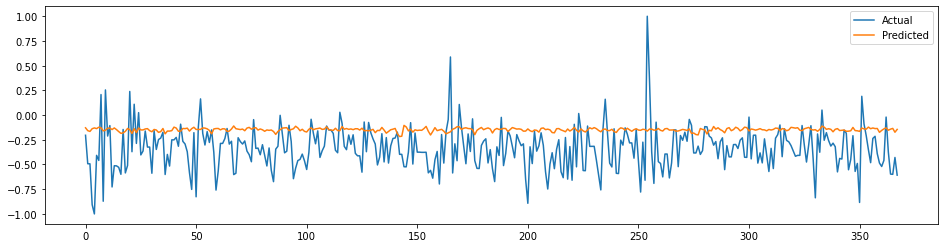

In [25]:
plot_results(validationMinMax_y,sarimaPred[:len(validationMinMax_y)],'',range(len(validationMinMax_y)))
plot_results(outOfSampleMinMax_y,sarimaPred[len(validationMinMax_y):],'',range(len(outOfSampleMinMax_y)))

#### As can be seen above, SARIMA cannot capture the non-linearity and rapid changes in data. Hence, NNs Comes to the rescue.

### Neural Nets Approach

In [26]:
from numpy import array

#split a multivariate sequence into samples that preserve the temporal structure of the data
#SOURCE:https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [27]:
n_steps_in = 30 #Number of observations from past that we assume to be relevant across time for forecasting.
n_steps_out = 1 #Number of units ahead that we want to forecast in the future

trainSeq_x, trainSeq_y = split_sequences(trainMinMax, n_steps_in, n_steps_out)

validationSeq_x, validationSeq_y = split_sequences(validationMinMax, n_steps_in, n_steps_out)

outOfSampleSeq_x, outOfSampleSeq_y = split_sequences(outOfSampleMinMax, n_steps_in, n_steps_out)

In [28]:
trainMinMax.shape

(4722, 601)

In [29]:
trainSeq_x.shape

(4693, 30, 600)

#### CNN

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2, l1_l2

In [31]:
############################# For Replicability : Always run this as one cell ##########################################
#SOURCE :
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

random.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.random.set_random_seed(1234)
#from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
###########################################################################################################################

EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)

epochs = 1000 #number of times the feed forward mechanism and back propagation are repeated 

bs = 100 #batch size for SGD :show what happens when batch size very small
lr = 0.001 #learning rate: the degree to which the weights are updated by each batch of SGD

sgd = SGD(lr=lr) #type of optimizer - Alternative: ADAM, NADAM

X, y = split_sequences(trainMinMax, n_steps_in,n_steps_out)
n_features = X.shape[2]

np.random.seed(0)

model = Sequential() #initializing keras Sequential model

#convolutional layer starts
model.add(Conv1D(filters=5,#number of filters
                 kernel_size=2,#size of the filter across time
                 strides=2, #number of rows that the filter moves ahead by
                 activation='linear',#transformation
                 input_shape=(n_steps_in, n_features))) #shape of 1 sample : preserves temporal structure
                #kernel_regularizer=l2(0.009),, bias_regularizer=l2(0.01)
#convolutional layer ends

model.add(MaxPooling1D(pool_size=1)) #sub-sampling layer - Alternative: AveragePooling1D

#model.add(BatchNormalization())
model.add(Dropout(0.1)) #reduces overfitting by dropping some weights randomly

#regression layer begins
model.add(Flatten())
model.add(Dense(1,#number of outputs
                activation='tanh',#transformation:other options include - ReLU,Linear,Sigmoid
                kernel_regularizer=l2(0.01))) 

model.compile(loss='mean_squared_error', optimizer='sgd') #specifies which optimizer and loss funtion to useto use 

#training the model
model.fit(trainSeq_x, trainSeq_y,
          batch_size=bs,
          epochs=epochs, 
          callbacks= [EarlyStop],
          verbose=2, 
          shuffle=False,#always set to false for time series data
          validation_data =(validationSeq_x, validationSeq_y))
                         
    
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 4693 samples, validate on 128 samples
Epoch 1/1000
 - 2s - loss: 0.1225 - val_loss: 0.3710
Epoch 2/1000
 - 0s - loss: 0.0532 - val_loss: 0.3501
Epoch 3/1000
 - 0s - loss: 0.0473 - val_loss: 0.3380
Epoch 4/1000
 - 0s - loss: 0.0439 - val_loss: 0.3368
Epoch 5/1000
 - 0s - loss: 0.0407 - val_loss: 0.3287
Epoch 6/1000
 - 0s - loss: 0.0388 - val_loss: 0.3239
Epoch 7/1000
 - 0s - loss: 0.0361 - val_loss: 0.3222
Epoch 8/1000
 - 0s - loss: 0.0349 - val_loss: 0.3162
Epoch 9/1000
 - 0s - loss: 0.0335 - val_loss: 0.3118
Epoch 10/1000
 - 0s - loss: 0.0328 - val_loss: 0.3085
Epoch 11/1000
 - 0s - loss: 0.0314 - val_loss: 0.3043
Epoch 12/1000
 - 0s - loss: 0.0306 - val_loss: 0.3002
Epoch 13/1000
 - 0s - loss: 0.0298 - val_loss: 0.2985
Epoch 14/1000
 - 0s - loss: 0.0290 - val_loss: 0.2931
Epoch 15/1000
 - 0s - loss: 0.0281 - val_loss: 0.2897
Epoch 16/1000
 - 0s - loss: 0.0277 - val_loss: 0.2855
Epoch 17/1000
 

 - 0s - loss: 0.0103 - val_loss: 0.1540
Epoch 137/1000
 - 0s - loss: 0.0103 - val_loss: 0.1539
Epoch 138/1000
 - 0s - loss: 0.0103 - val_loss: 0.1537
Epoch 139/1000
 - 0s - loss: 0.0103 - val_loss: 0.1535
Epoch 140/1000
 - 0s - loss: 0.0102 - val_loss: 0.1533
Epoch 141/1000
 - 0s - loss: 0.0102 - val_loss: 0.1532
Epoch 142/1000
 - 0s - loss: 0.0102 - val_loss: 0.1532
Epoch 143/1000
 - 1s - loss: 0.0101 - val_loss: 0.1530
Epoch 144/1000
 - 0s - loss: 0.0102 - val_loss: 0.1528
Epoch 145/1000
 - 0s - loss: 0.0102 - val_loss: 0.1528
Epoch 146/1000
 - 0s - loss: 0.0102 - val_loss: 0.1528
Epoch 147/1000
 - 0s - loss: 0.0101 - val_loss: 0.1526
Epoch 148/1000
 - 0s - loss: 0.0102 - val_loss: 0.1525
Epoch 149/1000
 - 0s - loss: 0.0101 - val_loss: 0.1524
Epoch 150/1000
 - 0s - loss: 0.0102 - val_loss: 0.1523
Epoch 151/1000
 - 0s - loss: 0.0101 - val_loss: 0.1522
Epoch 152/1000
 - 0s - loss: 0.0101 - val_loss: 0.1521
Epoch 153/1000
 - 0s - loss: 0.0101 - val_loss: 0.1521
Epoch 154/1000
 - 0s - lo

 - 0s - loss: 0.0097 - val_loss: 0.1443
Epoch 286/1000
 - 1s - loss: 0.0097 - val_loss: 0.1442
Epoch 287/1000
 - 1s - loss: 0.0097 - val_loss: 0.1442
Epoch 288/1000
 - 0s - loss: 0.0097 - val_loss: 0.1442
Epoch 289/1000
 - 0s - loss: 0.0097 - val_loss: 0.1442
Epoch 290/1000
 - 1s - loss: 0.0097 - val_loss: 0.1443
Epoch 291/1000
 - 1s - loss: 0.0097 - val_loss: 0.1443
Epoch 292/1000
 - 1s - loss: 0.0097 - val_loss: 0.1443
Epoch 293/1000
 - 1s - loss: 0.0097 - val_loss: 0.1442
Epoch 294/1000
 - 1s - loss: 0.0097 - val_loss: 0.1442
Epoch 295/1000
 - 1s - loss: 0.0096 - val_loss: 0.1441
Epoch 296/1000
 - 0s - loss: 0.0097 - val_loss: 0.1441
Epoch 297/1000
 - 1s - loss: 0.0097 - val_loss: 0.1440
Epoch 298/1000
 - 1s - loss: 0.0097 - val_loss: 0.1439
Epoch 299/1000
 - 1s - loss: 0.0097 - val_loss: 0.1438
Epoch 300/1000
 - 1s - loss: 0.0097 - val_loss: 0.1438
Epoch 301/1000
 - 1s - loss: 0.0096 - val_loss: 0.1437
Epoch 302/1000
 - 1s - loss: 0.0097 - val_loss: 0.1437
Epoch 303/1000
 - 1s - lo

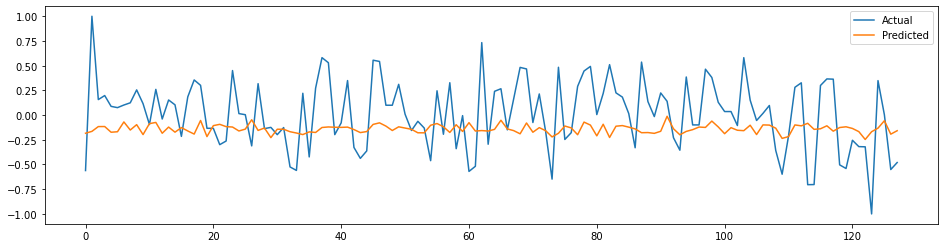

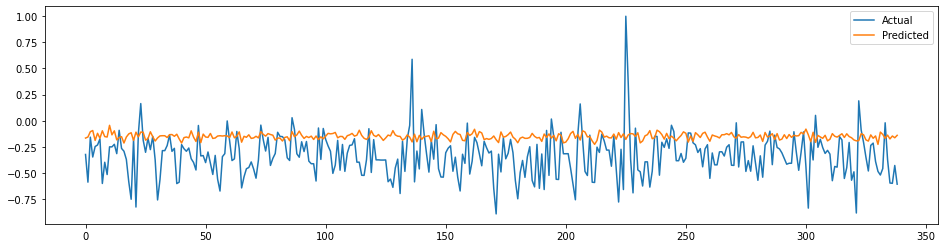

In [34]:
cnnValPred = model.predict(validationSeq_x)
cnnOOSPred = model.predict(outOfSampleSeq_x)

plot_results(validationSeq_y,cnnValPred,'',range(len(validationSeq_y)))
plot_results(outOfSampleSeq_y,cnnOOSPred,'',range(len(outOfSampleSeq_y)))

In [35]:
print(validationSeq_x.shape)
print(validationSeq_y.shape)

(128, 30, 600)
(128, 1)


In [37]:
#best
import numpy as np
from keras.layers import LSTM
import random

################################### Set for replicability ##################################################################
np.random.seed(42)
random.seed(12345)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
tf.random.set_random_seed(1234)
#from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
###########################################################################################################################


EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)
epochs = 1000
lr = 0.01

sgd = SGD(lr=lr) #; adam = Adam(lr=lr) ;nadam = Nadam(lr=lr)
bs = 100

n_steps_in = 30
n_steps_out = 1

#training sequence
trainSeq_x, trainSeq_y = split_sequences(trainMinMax, n_steps_in,n_steps_out)

#out of sample sequence
validationSeq_x, validationSeq_y= split_sequences(validationMinMax, n_steps_in,n_steps_out)

#out of sample sequence
outSampleSeq_x, outSampleSeq_y= split_sequences(outOfSampleMinMax, n_steps_in,n_steps_out)

X_useless, y_useless = split_sequences(trainMinMax, n_steps_in,n_steps_out)
n_features = X_useless.shape[2]

np.random.seed(0); print(np.random.rand(4))

model = Sequential()
model.add(LSTM(300, #number of LSTM nodes
               input_shape=(n_steps_in, n_features),
               activation = 'tanh')) #transformation:best to not use any other type of transformation
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')

#model
model.fit(trainSeq_x, trainSeq_y,batch_size=bs,epochs=epochs, callbacks= [EarlyStop] ,verbose=2, shuffle=False,
                         validation_data =(validationSeq_x, validationSeq_y))

[0.5488135  0.71518937 0.60276338 0.54488318]
Train on 4693 samples, validate on 128 samples
Epoch 1/1000
 - 12s - loss: 0.3648 - val_loss: 0.5034
Epoch 2/1000
 - 11s - loss: 0.0279 - val_loss: 0.4988
Epoch 3/1000
 - 10s - loss: 0.0250 - val_loss: 0.4816
Epoch 4/1000
 - 10s - loss: 0.0243 - val_loss: 0.4773
Epoch 5/1000
 - 10s - loss: 0.0228 - val_loss: 0.4764
Epoch 6/1000
 - 10s - loss: 0.0223 - val_loss: 0.4576
Epoch 7/1000
 - 10s - loss: 0.0217 - val_loss: 0.4509
Epoch 8/1000
 - 10s - loss: 0.0211 - val_loss: 0.4456
Epoch 9/1000
 - 10s - loss: 0.0201 - val_loss: 0.4312
Epoch 10/1000
 - 11s - loss: 0.0193 - val_loss: 0.4242
Epoch 11/1000
 - 10s - loss: 0.0190 - val_loss: 0.4307
Epoch 12/1000
 - 10s - loss: 0.0177 - val_loss: 0.4126
Epoch 13/1000
 - 10s - loss: 0.0182 - val_loss: 0.4136
Epoch 14/1000
 - 10s - loss: 0.0165 - val_loss: 0.4130
Epoch 15/1000
 - 10s - loss: 0.0167 - val_loss: 0.4071
Epoch 16/1000
 - 10s - loss: 0.0167 - val_loss: 0.4046
Epoch 17/1000
 - 10s - loss: 0.0163 

Epoch 148/1000
 - 10s - loss: 0.0100 - val_loss: 0.3099
Epoch 149/1000
 - 10s - loss: 0.0101 - val_loss: 0.3098
Epoch 150/1000
 - 10s - loss: 0.0100 - val_loss: 0.3099
Epoch 151/1000
 - 10s - loss: 0.0100 - val_loss: 0.3088
Epoch 152/1000
 - 10s - loss: 0.0100 - val_loss: 0.3092
Epoch 153/1000
 - 10s - loss: 0.0100 - val_loss: 0.3084
Epoch 154/1000
 - 10s - loss: 0.0100 - val_loss: 0.3090
Epoch 155/1000
 - 10s - loss: 0.0100 - val_loss: 0.3092
Epoch 156/1000
 - 10s - loss: 0.0100 - val_loss: 0.3096
Epoch 157/1000
 - 10s - loss: 0.0099 - val_loss: 0.3090
Epoch 158/1000
 - 10s - loss: 0.0100 - val_loss: 0.3079
Epoch 159/1000
 - 10s - loss: 0.0099 - val_loss: 0.3083
Epoch 160/1000
 - 10s - loss: 0.0100 - val_loss: 0.3082
Epoch 161/1000
 - 10s - loss: 0.0100 - val_loss: 0.3079
Epoch 162/1000
 - 10s - loss: 0.0100 - val_loss: 0.3080
Epoch 163/1000
 - 10s - loss: 0.0099 - val_loss: 0.3075
Epoch 164/1000
 - 10s - loss: 0.0099 - val_loss: 0.3076
Epoch 165/1000
 - 10s - loss: 0.0100 - val_loss:

KeyboardInterrupt: 

In [ ]:
# validation metrics 
lstmValPred = model.predict(validationSeq_x)
#out of sample metrics
lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y ,lstmValPred  ,'LSTM Validation',range(len(validationSeq_y )))
plot_results(outSampleSeq_y ,lstmOutSamplePred  ,'LSTM Testing',range(len(outSampleSeq_y)))